# Milestone 1 - Dataset Exploration 

## Introduction to the Dataset

### Context and Introduction  
The **US Drought & Meteorological Data** dataset, available on [Kaggle](https://www.kaggle.com/datasets/cdminix/us-drought-meteorological-data/data), combines meteorological indicators with drought severity levels from the **U.S. Drought Monitor**. It was created to support data-driven drought prediction by linking weather conditions with expert-assessed drought categories (D0–D4) and no drought at all. Each observation corresponds to a specific county in the United States, identified by its FIPS code, and includes various climatic features, daily obtained, such as temperature, precipitation, humidity, wind speed, and soil moisture, which will be explained later.

The dataset integrates information from the **National Drought Mitigation Center (NDMC)**, **NOAA**, and **USDA**, which produce weekly drought classifications based on multiple climate variables such as precipitation, temperature, and soil moisture.  
Meteorological data were aggregated and aligned with these drought severity labels to enable **machine learning applications in climate and environmental monitoring**.

The dataset is already divided into three subsets:
- **Training Set:** Contains historical data from 2000 to 2016, used to train machine learning models.  
- **Validation Set:** Contains data from 2017 to 2018, used for hyperparameter tuning and model selection.  
- **Test Set:** Contains data from 2019 to 2020, used to test the model accuracy prediction.

All the subsets contain the same feature structure and data organization. For the context of this project, as explained later, it will be used this splitting format.

**Application Domain:** This dataset belongs to the domain of **climate science and environmental modeling**, with key applications in:
- Drought risk assessment and early warning systems  
- Agricultural and water resource management  
- Climate variability analysis  

### Features Overview 
All dataset contains **19 meteorological indicators**, a **date column**, a **county identifier (`fips`)**, and a **target variable (`score`)** representing drought severity.  

- **Total entries:** 23841468 - *19300680 (training dataset), 2268840 (validation dataset), 2271948 (test dataset)*
- **Total columns:** 21  
- **Temporal coverage:** Daily observations across multiple U.S. counties  
- **Target variable:** `score` — representing drought severity intensity (ordinal numeric scale)  

| Feature | Description | Type | Unit |
|----------|--------------|------|------|
| `fips` | FIPS code identifying the USA county | int64 | – |
| `date` | Observation date | object | YYYY-MM-DD |
| `PRECTOT` | Total Precipitation | float64 | mm/day |
| `PS` | Surface Pressure | float64 | kPa |
| `QV2M` | Specific Humidity at 2 Meters | float64 | g/kg |
| `T2M` | Air Temperature at 2 Meters | float64 | °C |
| `T2MDEW` | Dew/Frost Point Temperature at 2 Meters | float64 | °C |
| `T2MWET` | Wet Bulb Temperature at 2 Meters | float64 | °C |
| `T2M_MAX` | Maximum Temperature at 2 Meters | float64 | °C |
| `T2M_MIN` | Minimum Temperature at 2 Meters | float64 | °C |
| `T2M_RANGE` | Temperature Range at 2 Meters | float64 | °C |
| `TS` | Earth Skin Temperature | float64 | °C |
| `WS10M` | Wind Speed at 10 Meters | float64 | m/s |
| `WS10M_MAX` | Maximum Wind Speed at 10 Meters | float64 | m/s |
| `WS10M_MIN` | Minimum Wind Speed at 10 Meters | float64 | m/s |
| `WS10M_RANGE` | Wind Speed Range at 10 Meters | float64 | m/s |
| `WS50M` | Wind Speed at 50 Meters | float64 | m/s |
| `WS50M_MAX` | Maximum Wind Speed at 50 Meters | float64 | m/s |
| `WS50M_MIN` | Minimum Wind Speed at 50 Meters | float64 | m/s |
| `WS50M_RANGE` | Wind Speed Range at 50 Meters | float64 | m/s |
| `score` | Drought severity indicator (target variable) | float64  | – |


In [1]:
import pandas as pd
import numpy as np

# --- File paths ---
# to create the files with the necessary county, you can run the code with the train, test and validation separately

INPUT_CSV_TRAIN = '../data/archive/train_timeseries/train_timeseries.csv'        
OUTPUT_CSV_TRAIN = '../data/generated_data/fips_6107_drought_features_train.csv'

INPUT_CSV_VAL = '../data/archive/validation_timeseries/validation_timeseries.csv'        
OUTPUT_CSV_VAL = '../data/generated_data/fips_6107_drought_features_validation.csv'

INPUT_CSV_TEST = '../data/archive/test_timeseries/test_timeseries.csv'        
OUTPUT_CSV_TEST = '../data/generated_data/fips_6107_drought_features_test.csv'

# Load your data
df_original_train = pd.read_csv(INPUT_CSV_TRAIN)
df_original_val = pd.read_csv(INPUT_CSV_VAL)
df_original_test = pd.read_csv(INPUT_CSV_TEST)
df_original_train.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In conclusion, as a starter, we have our dateset devided into:
- **Train**: with 19 300 680 observations and 21 features (`19300680 x 21`)
- **Validation**: with 2 268 840 obersations and 21 features (`2268840 x 21`)
- **Test**: with 2 271 948 observations and 21 features (`2271948 x 21`)

### Output Variable  

- **Variable:** `score`  
- **Type:** Ordinal categorical variable (`D0`–`D4`) and no drought class (`0`)
- **Meaning:** Represents drought severity, from Abnormally Dry (D0) to Exceptional Drought (D4) and no drought shown at all.

### Learning Task Definition  
The objective of this study is to **predict drought severity levels** using meteorological and climatic indicators.  
This task is formulated as an **ordinal classification problem**, since the drought classes (`D0`–`D4`) and no drought class `0` represent an ordered sequence of severity levels.

## Preprocessing 

Before conducting exploratory analysis, the dataset will be **preprocessed and reprocessed** to make it suitable for machine learning.  

The original dataset contains multiple counties, potential missing values, a target class with a continuous value (it should be categorical) and temporal dependencies that require careful handling. Considering this, the following preprocessing steps will be undertaken:
- **County Selection:** For simplicity and computational efficiency, the analysis will focus on a single county (identified by its `fips` code). This allows for consistent temporal modeling without the added complexity of spatial variability across counties. The selected county should have a representative distribution of drought classes.
- **Missing Target Value Handling:** Any missing values in the score target (corresponding to the weekly observations) will be signalised into a `scored_dates` variable which later will be used on the feature engineering analysis to create new features.
- **Date Handling:** The `date` column will be converted to a datetime format to facilitate temporal analysis and feature engineering.
- **Convert float score into int score** in order to the target class matches the correct drought classes, as shown on the dataset description.

In [2]:
class preprocessing:
    """
    A class to preprocess the datasets before to feature engineering.
    Steps:
    1. County selection (by FIPS code)
    2. Missing target value handling (store non-missing target dates)
    3. Date conversion to datetime format
    4. Convert target variable (float → int)
    """
    def __init__(self, fips_code, target_col='score', date_col='date'):
        if isinstance(fips_code, (int, str)):
            self.fips_code = [int(fips_code)]
        elif isinstance(fips_code, (list, tuple, set)):
            self.fips_code = [int(f) for f in fips_code]
        else:
            raise TypeError("fips_code must be int, str, list, tuple, or set.")
        #self.fips_code = fips_code
        self.target_col = target_col
        self.date_col = date_col
        self.scored_dates = None  # Will store non-missing target dates

    def apply_all(self, df):
        df = self.select_county(df)
        df = self.handle_missing_target(df)
        df = self.data_format(df)
        df = self.convert_target_to_int(df)
        return df

    # def select_county(self, df):
    #     """Filter dataset for the selected county."""
    #     df = df[df['fips'] == self.fips_code].copy()
    #     if df.empty:
    #         raise ValueError(f"No data found for county FIPS code {self.fips_code}")
    #     return df
    def select_county(self, df):
        """Filter dataset for the selected county or counties."""
        df = df[df['fips'].isin(self.fips_code)].copy()

        if df.empty:
            raise ValueError(f"No data found for county FIPS codes {self.fips_code}")

        return df

    def handle_missing_target(self, df):
        """Identify missing target values and store the dates of valid scores."""
        df = df.copy()
        self.scored_dates = df[df[self.target_col].notna()][self.date_col].values
        return df

    def data_format(self, df):
        """Convert the date column to datetime format."""
        df = df.copy()
        df[self.date_col] = pd.to_datetime(df[self.date_col])
        return df
    
    def convert_target_to_int(self, df):
        """Convert the target variable from float to integer drought class."""
        df = df.copy()
        if df[self.target_col].isnull().all():
            print("Warning: All target values are missing; conversion skipped.")
        else:
            rounded = df[self.target_col].round()
            rounded = rounded.clip(upper=4)
            df[self.target_col] = rounded.astype("Int64")

        return df


In [3]:
# FIPS_CODE = 6107 # é muito mau, nem vale a pena
# FIPS_CODE = 48487

FIPS_CODE = 12051 # ESTE É MUITO BOM CARALHO
# FIPS_CODE = 1099 # tentar este a seguir, tem dados destribuidos

pre_train = preprocessing(fips_code=FIPS_CODE, target_col='score', date_col='date')
df_pre_train = pre_train.apply_all(df_original_train)

pre_val = preprocessing(fips_code=FIPS_CODE, target_col='score', date_col='date')
df_pre_val = pre_val.apply_all(df_original_val)

pre_test = preprocessing(fips_code=FIPS_CODE, target_col='score', date_col='date')
df_pre_test = pre_test.apply_all(df_original_test)

In [4]:
# Checking on train dataset
print(f"Total rows in input: {len(df_original_train)}")
print(f"Rows for FIPS {FIPS_CODE}: {len(df_pre_train)}")
print(f"Weekly (scored) dates found: {len(pre_train.scored_dates)}")
df_pre_train.head()

Total rows in input: 19300680
Rows for FIPS 12051: 6210
Weekly (scored) dates found: 887


,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
1956150,12051,2000-01-01,0.02,102.09,11.50,18.92,16.44,16.44,24.91,14.37,...,18.46,2.84,3.25,2.28,0.96,4.86,6.86,3.28,3.58,<NA>
1956151,12051,2000-01-02,0.01,102.13,11.32,19.14,16.25,16.25,25.17,14.83,...,18.77,3.42,4.82,2.56,2.26,5.78,6.51,4.92,1.59,<NA>
1956152,12051,2000-01-03,0.84,101.91,12.61,19.65,17.86,17.86,26.03,14.27,...,19.31,3.42,4.91,2.56,2.35,5.70,6.80,4.71,2.10,<NA>
1956153,12051,2000-01-04,2.46,101.80,13.54,21.02,19.00,19.00,26.43,17.86,...,20.72,3.46,5.37,2.54,2.83,5.91,6.64,4.98,1.67,0
1956154,12051,2000-01-05,1.10,101.99,9.86,17.62,13.82,13.82,21.53,14.23,...,17.73,4.28,6.23,2.42,3.81,6.46,8.30,4.56,3.74,<NA>


## Feature engineering 
After preprocessing the dataset and selecting the weekly target dates, the featureEngineering class generates all features required for modeling drought conditions.

For each scored (weekly) date, the class performs the following steps:

- **Rolling Window Masks**: Creates 7-day, 30-day, 90-day, and 180-day windows ending on the target date.

- **Cyclical Date Encoding**: Converts the day of the year into sine and cosine values to capture seasonal patterns (Dec 31 → Jan 1).

- **Precipitation Features**: Computes total precipitation over each window.

- **Temperature Features**: Computes mean/max/min/range of temperature variables (T2M, T2M_MAX, T2M_MIN, T2M_RANGE, TS), including extreme-heat indicators.

- **Humidity Features**: Computes mean specific humidity, dew point, and wet-bulb temperature.

- **Wind Features**: Computes mean, max, min, and range for wind speed at 10m and 50m height (7d and 30d windows).

- **Pressure Features**: Computes mean surface pressure (7d and 30d).

- **Derived Indicators**: Computes precipitation deficits, temperature anomalies, and VPD proxies.

- **Final Feature Row**: Combines all computed variables with the target score into one feature row per weekly date.

In [5]:
class featureEngineering:
    """
    Computes the feature engineering for the datasert.
    Computes rolling window aggregates and derived features for weekly target dates.
    """
    def __init__(self, df: pd.DataFrame, target_fips: str, date_col: str = 'date', target_col: str = 'score'):
        self.df = df.copy()
        self.target_fips = target_fips
        self.date_col = date_col
        self.target_col = target_col
        
    def create_features(self, scored_dates):
        """
        Create feature dataset for all scored (weekly) dates.
        """
        result_rows = []
        
        for target_date in scored_dates:
            target_date = pd.Timestamp(target_date)
            
            # Get the score for this week from the dataframe
            score_value = self.df.loc[self.df[self.date_col] == target_date, self.target_col].values[0]
            
            # Create masks for different rolling windows
            masks = self.create_window_masks(target_date)
            
            # Initialize row with basic info
            row = {
                'fips': self.target_fips,
                self.date_col: target_date,
                self.target_col: score_value
            }
            
            # Compute all feature groups
            row.update(self.encode_cyclical_date(target_date))
            row.update(self.compute_precipitation_features(masks))
            row.update(self.compute_temperature_features(masks))
            row.update(self.compute_humidity_features(masks))
            row.update(self.compute_wind_features(masks))
            row.update(self.compute_pressure_features(masks))
            row.update(self.compute_derived_features(row))
            
            result_rows.append(row)
        
        df_features = pd.DataFrame(result_rows)        
        return df_features
    
    def create_window_masks(self, target_date):
        """
        Create boolean masks for different rolling windows ending on target_date.
        """
        masks = {}
        for days in [7, 30, 90, 180]:
            mask = (
                (self.df[self.date_col] <= target_date) & 
                (self.df[self.date_col] > target_date - pd.Timedelta(days=days))
            )
            masks[f'{days}d'] = mask
        
        return masks
    
    def encode_cyclical_date(self, target_date):
        """
        Encode day of year as cyclical feature using sin/cos transformation.
        Captures seasonal patterns with smooth year-end wrap-around.
        """
        day_of_year = target_date.dayofyear
        days_in_year = 366 if target_date.is_leap_year else 365
        
        return {
            'day_of_year_sin': np.sin(2 * np.pi * day_of_year / days_in_year),
            'day_of_year_cos': np.cos(2 * np.pi * day_of_year / days_in_year)
        }
    
    def compute_precipitation_features(self, masks):
        """
        Compute precipitation sum features over different windows.
        """
        features = {}
        
        for period in ['7d', '30d', '90d', '180d']:
            features[f'prec_sum_{period}'] = self.df.loc[masks[period], 'PRECTOT'].sum()
        
        return features
    
    def compute_temperature_features(self, masks):
        """
        Compute temperature-related features over different windows.
        Includes mean, max, min, range, and surface temperature.
        """
        features = {}
        
        # Mean temperatures over all windows
        for period in ['7d', '30d', '90d', '180d']:
            mask = masks[period]
            features[f't2m_mean_{period}'] = self.df.loc[mask, 'T2M'].mean()
            features[f't2m_max_mean_{period}'] = self.df.loc[mask, 'T2M_MAX'].mean()
            features[f't2m_min_mean_{period}'] = self.df.loc[mask, 'T2M_MIN'].mean()
            features[f't2m_range_mean_{period}'] = self.df.loc[mask, 'T2M_RANGE'].mean()
            features[f'ts_mean_{period}'] = self.df.loc[mask, 'TS'].mean()
        
        # Maximum temperatures for heatwave detection (7d and 30d only)
        features['t2m_max_7d'] = self.df.loc[masks['7d'], 'T2M_MAX'].max()
        features['t2m_max_30d'] = self.df.loc[masks['30d'], 'T2M_MAX'].max()
        
        return features
    
    def compute_humidity_features(self, masks):
        """
        Compute humidity proxy features over short to medium windows.
        Includes specific humidity, dew point, and wet bulb temperature.
        """
        features = {}
        
        for period in ['7d', '30d', '90d']:
            mask = masks[period]
            features[f'qv2m_mean_{period}'] = self.df.loc[mask, 'QV2M'].mean()
            features[f't2mdew_mean_{period}'] = self.df.loc[mask, 'T2MDEW'].mean()
            features[f't2mwet_mean_{period}'] = self.df.loc[mask, 'T2MWET'].mean()
        
        return features
    
    def compute_wind_features(self, masks) :
        """
        Compute wind features at 10m and 50m heights.
        Includes mean, max, min, and range for evaporative demand estimation.
        """
        features = {}
        
        for period in ['7d', '30d']:
            mask = masks[period]
            
            # 10m wind features
            features[f'ws10m_mean_{period}'] = self.df.loc[mask, 'WS10M'].mean()
            features[f'ws10m_max_{period}'] = self.df.loc[mask, 'WS10M_MAX'].max()
            features[f'ws10m_min_mean_{period}'] = self.df.loc[mask, 'WS10M_MIN'].mean()
            features[f'ws10m_range_mean_{period}'] = self.df.loc[mask, 'WS10M_RANGE'].mean()
            
            # 50m wind features
            features[f'ws50m_mean_{period}'] = self.df.loc[mask, 'WS50M'].mean()
            features[f'ws50m_max_{period}'] = self.df.loc[mask, 'WS50M_MAX'].max()
            features[f'ws50m_min_mean_{period}'] = self.df.loc[mask, 'WS50M_MIN'].mean()
            features[f'ws50m_range_mean_{period}'] = self.df.loc[mask, 'WS50M_RANGE'].mean()
        
        return features
    
    def compute_pressure_features(self, masks):
        """
        Compute surface pressure features over short windows.
        """
        features = {}
        
        features['ps_mean_7d'] = self.df.loc[masks['7d'], 'PS'].mean()
        features['ps_mean_30d'] = self.df.loc[masks['30d'], 'PS'].mean()
        
        return features
    
    def compute_derived_features(self, row):
        """
        Compute derived features that combine multiple base features.
        Includes precipitation deficits, temperature anomalies, and VPD proxy.
        """
        features = {}
        
        # Precipitation deficit (recent vs longer-term average)
        features['prec_deficit_30v90d'] = row['prec_sum_30d'] - (row['prec_sum_90d'] / 3)
        features['prec_deficit_7v30d'] = row['prec_sum_7d'] - (row['prec_sum_30d'] / 4.3)
        
        # Temperature anomaly (recent vs longer-term)
        features['temp_anomaly_7v90d'] = row['t2m_mean_7d'] - row['t2m_mean_90d']
        features['temp_anomaly_30v180d'] = row['t2m_mean_30d'] - row['t2m_mean_180d']
        
        # Vapor pressure deficit proxy (temperature - dewpoint)
        features['vpd_proxy_7d'] = row['t2m_mean_7d'] - row['t2mdew_mean_7d']
        features['vpd_proxy_30d'] = row['t2m_mean_30d'] - row['t2mdew_mean_30d']
        
        return features



In [6]:
# Create the feature engineering instance
fe_train = featureEngineering(df=df_pre_train, target_fips=FIPS_CODE, date_col='date', target_col='score')
df_fe_train = fe_train.create_features(scored_dates=pre_train.scored_dates)

fe_val = featureEngineering(df=df_pre_val, target_fips=FIPS_CODE, date_col='date', target_col='score')
df_fe_val = fe_val.create_features(scored_dates=pre_val.scored_dates)

fe_test = featureEngineering(df=df_pre_test, target_fips=FIPS_CODE, date_col='date', target_col='score')
df_fe_test = fe_test.create_features(scored_dates=pre_test.scored_dates)

In [7]:
# Checking on train dataset
print(f"Dataset created with {len(df_fe_train)} weekly observations")
print(f"Total features: {len(df_fe_train.columns)}")
df_fe_train.head()

Dataset created with 887 weekly observations
Total features: 64


,fips,date,score,day_of_year_sin,day_of_year_cos,prec_sum_7d,prec_sum_30d,prec_sum_90d,prec_sum_180d,t2m_mean_7d,...,ws50m_min_mean_30d,ws50m_range_mean_30d,ps_mean_7d,ps_mean_30d,prec_deficit_30v90d,prec_deficit_7v30d,temp_anomaly_7v90d,temp_anomaly_30v180d,vpd_proxy_7d,vpd_proxy_30d
0,12051,2000-01-04,0,0.068615,0.997643,3.33,3.33,3.33,3.33,19.682500,...,4.472500,2.235000,101.982500,101.982500,2.220000,2.555581,0.000000,0.00000,2.295000,2.295000
1,12051,2000-01-11,0,0.187719,0.982223,6.49,9.82,9.82,9.82,20.160000,...,4.120909,2.589091,101.972857,101.976364,6.546667,4.206279,0.173636,0.00000,2.745714,2.581818
2,12051,2000-01-18,0,0.304115,0.952635,1.56,11.38,11.38,11.38,15.957143,...,4.197778,3.358889,102.504286,102.181667,7.586667,-1.086512,-2.462302,0.00000,5.711429,3.798889
3,12051,2000-01-25,0,0.416125,0.909308,21.87,33.25,33.25,33.25,14.970000,...,4.524800,3.636400,101.421429,101.968800,22.166667,14.137442,-2.483600,0.00000,4.312857,3.942800
4,12051,2000-02-01,0,0.522133,0.852864,1.34,34.56,34.59,34.59,14.151429,...,4.379000,3.681333,102.037143,101.975333,23.030000,-6.697209,-2.579821,-0.15325,4.507143,4.158333


### Dropping FIPS feature

In [8]:
for df in [df_fe_train, df_fe_val, df_fe_test]:
    df.drop(columns=["fips"], inplace=True, errors="ignore")
df_fe_train.head()

,date,score,day_of_year_sin,day_of_year_cos,prec_sum_7d,prec_sum_30d,prec_sum_90d,prec_sum_180d,t2m_mean_7d,t2m_max_mean_7d,...,ws50m_min_mean_30d,ws50m_range_mean_30d,ps_mean_7d,ps_mean_30d,prec_deficit_30v90d,prec_deficit_7v30d,temp_anomaly_7v90d,temp_anomaly_30v180d,vpd_proxy_7d,vpd_proxy_30d
0,2000-01-04,0,0.068615,0.997643,3.33,3.33,3.33,3.33,19.682500,25.635000,...,4.472500,2.235000,101.982500,101.982500,2.220000,2.555581,0.000000,0.00000,2.295000,2.295000
1,2000-01-11,0,0.187719,0.982223,6.49,9.82,9.82,9.82,20.160000,25.568571,...,4.120909,2.589091,101.972857,101.976364,6.546667,4.206279,0.173636,0.00000,2.745714,2.581818
2,2000-01-18,0,0.304115,0.952635,1.56,11.38,11.38,11.38,15.957143,22.087143,...,4.197778,3.358889,102.504286,102.181667,7.586667,-1.086512,-2.462302,0.00000,5.711429,3.798889
3,2000-01-25,0,0.416125,0.909308,21.87,33.25,33.25,33.25,14.970000,21.501429,...,4.524800,3.636400,101.421429,101.968800,22.166667,14.137442,-2.483600,0.00000,4.312857,3.942800
4,2000-02-01,0,0.522133,0.852864,1.34,34.56,34.59,34.59,14.151429,20.600000,...,4.379000,3.681333,102.037143,101.975333,23.030000,-6.697209,-2.579821,-0.15325,4.507143,4.158333


### Feature Scaling
Meteorological features will be normalized to ensure they are on comparable scales, which is important for many machine learning algorithms.

In [9]:
from sklearn.preprocessing import StandardScaler

def scale_train_val_test(df_train, df_val, df_test):
    no_scale_cols = ['date', 'score', 'day_of_year_sin', 'day_of_year_cos']
    scale_cols = [c for c in df_train.columns if c not in no_scale_cols]

    scaler = StandardScaler()

    df_train_scaled = df_train.copy()
    df_train_scaled[scale_cols] = scaler.fit_transform(df_train[scale_cols])

    df_val_scaled = df_val.copy()
    df_val_scaled[scale_cols] = scaler.transform(df_val[scale_cols])

    df_test_scaled = df_test.copy()
    df_test_scaled[scale_cols] = scaler.transform(df_test[scale_cols])

    return df_train_scaled, df_val_scaled, df_test_scaled, scaler

In [10]:
df_scaled_train = scale_train_val_test(df_fe_train, df_fe_val, df_fe_test)[0]
df_scaled_val = scale_train_val_test(df_fe_train, df_fe_val, df_fe_test)[1]
df_scaled_test = scale_train_val_test(df_fe_train, df_fe_val, df_fe_test)[2]

In [11]:
# Checking on train dataset
df_scaled_train.head()

,date,score,day_of_year_sin,day_of_year_cos,prec_sum_7d,prec_sum_30d,prec_sum_90d,prec_sum_180d,t2m_mean_7d,t2m_max_mean_7d,...,ws50m_min_mean_30d,ws50m_range_mean_30d,ps_mean_7d,ps_mean_30d,prec_deficit_30v90d,prec_deficit_7v30d,temp_anomaly_7v90d,temp_anomaly_30v180d,vpd_proxy_7d,vpd_proxy_30d
0,2000-01-04,0,0.068615,0.997643,-0.818615,-1.254990,-1.619332,-2.250275,-0.789252,-0.739345,...,1.470647,-2.817146,1.502927,1.917980,0.040521,0.141708,-0.006741,-0.014945,-1.262117,-1.458084
1,2000-01-11,0,0.187719,0.982223,-0.692657,-1.172725,-1.584682,-2.226116,-0.679940,-0.757704,...,1.080787,-2.104201,1.469152,1.890501,0.124341,0.235729,0.046831,-0.014945,-1.027300,-1.285406
2,2000-01-18,0,0.304115,0.952635,-0.889167,-1.152951,-1.576353,-2.220309,-1.642081,-1.719845,...,1.166022,-0.554250,3.330560,2.809858,0.144489,-0.065738,-0.766428,-0.014945,0.517808,-0.552670
3,2000-01-25,0,0.416125,0.909308,-0.079608,-0.875735,-1.459588,-2.138897,-1.868063,-1.881715,...,1.528640,0.004505,-0.462310,1.856631,0.426946,0.801389,-0.772999,-0.014945,-0.210834,-0.466029
4,2000-02-01,0,0.522133,0.852864,-0.897936,-0.859130,-1.452433,-2.133909,-2.055455,-2.130837,...,1.366970,0.094976,1.694322,1.885887,0.443672,-0.385312,-0.802686,-0.052141,-0.109613,-0.336267


### Export results
Saves the engineered features to CSV for downstream modeling.

In [12]:
# Save to CSV
df_scaled_train.to_csv(OUTPUT_CSV_TRAIN, index=False)
df_scaled_val.to_csv(OUTPUT_CSV_VAL, index=False)
df_scaled_test.to_csv(OUTPUT_CSV_TEST, index=False)

print(f"Train dataset features saved to: {OUTPUT_CSV_TRAIN}")
print(f"Validation dataset features saved to: {OUTPUT_CSV_VAL}")
print(f"Test dataset features saved to: {OUTPUT_CSV_TEST}")
print(f"Columns ({len(df_scaled_train.columns)}):")
print(df_scaled_train.columns.tolist())

Train dataset features saved to: ../data/generated_data/fips_6107_drought_features_train.csv
Validation dataset features saved to: ../data/generated_data/fips_6107_drought_features_validation.csv
Test dataset features saved to: ../data/generated_data/fips_6107_drought_features_test.csv
Columns (63):
['date', 'score', 'day_of_year_sin', 'day_of_year_cos', 'prec_sum_7d', 'prec_sum_30d', 'prec_sum_90d', 'prec_sum_180d', 't2m_mean_7d', 't2m_max_mean_7d', 't2m_min_mean_7d', 't2m_range_mean_7d', 'ts_mean_7d', 't2m_mean_30d', 't2m_max_mean_30d', 't2m_min_mean_30d', 't2m_range_mean_30d', 'ts_mean_30d', 't2m_mean_90d', 't2m_max_mean_90d', 't2m_min_mean_90d', 't2m_range_mean_90d', 'ts_mean_90d', 't2m_mean_180d', 't2m_max_mean_180d', 't2m_min_mean_180d', 't2m_range_mean_180d', 'ts_mean_180d', 't2m_max_7d', 't2m_max_30d', 'qv2m_mean_7d', 't2mdew_mean_7d', 't2mwet_mean_7d', 'qv2m_mean_30d', 't2mdew_mean_30d', 't2mwet_mean_30d', 'qv2m_mean_90d', 't2mdew_mean_90d', 't2mwet_mean_90d', 'ws10m_mean_7d',

### Quick QA checks
Missing values, dtypes, and a preview.

In [13]:
# Train
print("The train dataset has shape:", df_scaled_train.shape)
print("Train dataset info:")
df_scaled_train.info()

The train dataset has shape: (887, 63)
Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  887 non-null    datetime64[ns]
 1   score                 887 non-null    int64         
 2   day_of_year_sin       887 non-null    float64       
 3   day_of_year_cos       887 non-null    float64       
 4   prec_sum_7d           887 non-null    float64       
 5   prec_sum_30d          887 non-null    float64       
 6   prec_sum_90d          887 non-null    float64       
 7   prec_sum_180d         887 non-null    float64       
 8   t2m_mean_7d           887 non-null    float64       
 9   t2m_max_mean_7d       887 non-null    float64       
 10  t2m_min_mean_7d       887 non-null    float64       
 11  t2m_range_mean_7d     887 non-null    float64       
 12  ts_mean_7d         

In [14]:
# Validation
print("The validation dataset has shape:", df_scaled_val.shape)
print("Valiadation dataset info:")
df_scaled_val.info()

The validation dataset has shape: (104, 63)
Valiadation dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  104 non-null    datetime64[ns]
 1   score                 104 non-null    int64         
 2   day_of_year_sin       104 non-null    float64       
 3   day_of_year_cos       104 non-null    float64       
 4   prec_sum_7d           104 non-null    float64       
 5   prec_sum_30d          104 non-null    float64       
 6   prec_sum_90d          104 non-null    float64       
 7   prec_sum_180d         104 non-null    float64       
 8   t2m_mean_7d           104 non-null    float64       
 9   t2m_max_mean_7d       104 non-null    float64       
 10  t2m_min_mean_7d       104 non-null    float64       
 11  t2m_range_mean_7d     104 non-null    float64       
 12  ts_mean_

In [15]:
# Test
print("The test dataset has shape:", df_scaled_test.shape)
print("Test dataset info:")
df_scaled_test.info()

The test dataset has shape: (105, 63)
Test dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  105 non-null    datetime64[ns]
 1   score                 105 non-null    int64         
 2   day_of_year_sin       105 non-null    float64       
 3   day_of_year_cos       105 non-null    float64       
 4   prec_sum_7d           105 non-null    float64       
 5   prec_sum_30d          105 non-null    float64       
 6   prec_sum_90d          105 non-null    float64       
 7   prec_sum_180d         105 non-null    float64       
 8   t2m_mean_7d           105 non-null    float64       
 9   t2m_max_mean_7d       105 non-null    float64       
 10  t2m_min_mean_7d       105 non-null    float64       
 11  t2m_range_mean_7d     105 non-null    float64       
 12  ts_mean_7d           

In conclusion, after some feature engineering, we have our dateset devided into:
- **Train**: with 887 observations and 64 features (`887 x 64`)
- **Validation**: with 104 obersations and 64 features (`104 x 64`)
- **Test**: with 105 observations and 65 features (`105 x 64`)

## Drought analysis and exploratory plots

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

### Style configuration

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

### Reload the data

In [17]:
df_train = pd.read_csv(OUTPUT_CSV_TRAIN)
df_val =pd.read_csv(OUTPUT_CSV_VAL)
df_test = pd.read_csv(OUTPUT_CSV_TEST)

### Figure 1: Precipitation Variables

In [ ]:
df = df_train

print("\nGenerating Figure 1: Precipitation Analysis...")

fig1 = plt.figure(figsize=(18, 10))
gs1 = GridSpec(3, 2, figure=fig1, hspace=0.3, wspace=0.3)
fig1.suptitle('Precipitation Variables - Temporal Evolution', fontsize=16, fontweight='bold', y=0.995)

# Precipitation sums over different periods
ax1 = fig1.add_subplot(gs1[0, :])
ax1.plot(df['date'], df['prec_sum_7d'], label='7-day sum', linewidth=1.5, alpha=0.8, color='#1E88E5')
ax1.plot(df['date'], df['prec_sum_30d'], label='30-day sum', linewidth=1.5, alpha=0.8, color='#43A047')
ax1.fill_between(df['date'], df['prec_sum_7d'], alpha=0.2, color='#1E88E5')
ax1.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold')
ax1.set_title('Precipitation Accumulation - Short Term (7 & 30 days)', fontsize=12, fontweight='bold', pad=10)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3)

# Longer-term precipitation
ax2 = fig1.add_subplot(gs1[1, :])
ax2.plot(df['date'], df['prec_sum_90d'], label='90-day sum', linewidth=1.5, alpha=0.8, color='#FB8C00')
ax2.plot(df['date'], df['prec_sum_180d'], label='180-day sum', linewidth=1.5, alpha=0.8, color='#E53935')
ax2.fill_between(df['date'], df['prec_sum_90d'], alpha=0.2, color='#FB8C00')
ax2.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold')
ax2.set_title('Precipitation Accumulation - Long Term (90 & 180 days)', fontsize=12, fontweight='bold', pad=10)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3)

# Precipitation deficit
ax3 = fig1.add_subplot(gs1[2, 0])
ax3.plot(df['date'], df['prec_deficit_7v30d'], linewidth=1.5, alpha=0.8, color='#5E35B1')
ax3.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax3.fill_between(df['date'], df['prec_deficit_7v30d'], 0, 
                 where=(df['prec_deficit_7v30d'] < 0), alpha=0.3, color='red', label='Deficit')
ax3.fill_between(df['date'], df['prec_deficit_7v30d'], 0, 
                 where=(df['prec_deficit_7v30d'] >= 0), alpha=0.3, color='green', label='Surplus')
ax3.set_ylabel('Deficit (mm)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Date', fontsize=11, fontweight='bold')
ax3.set_title('Precipitation Deficit: 7-day vs 30-day', fontsize=12, fontweight='bold', pad=10)
ax3.legend(loc='upper left', framealpha=0.9)
ax3.grid(True, alpha=0.3)

# Distribution boxplot
ax4 = fig1.add_subplot(gs1[2, 1])
prec_data = [df['prec_sum_7d'].dropna(), df['prec_sum_30d'].dropna(), 
             df['prec_sum_90d'].dropna(), df['prec_sum_180d'].dropna()]
bp1 = ax4.boxplot(prec_data, labels=['7d', '30d', '90d', '180d'], patch_artist=True, notch=True)
colors = ['#1E88E5', '#43A047', '#FB8C00', '#E53935']
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax4.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold')
ax4.set_xlabel('Time Period', fontsize=11, fontweight='bold')
ax4.set_title('Precipitation Distribution by Period', fontsize=12, fontweight='bold', pad=10)
ax4.grid(axis='y', alpha=0.3)

plt.savefig('../notebooks/img/drought_precipitation_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_precipitation_analysis.png")

### Figure 2: Temperature Variables

In [ ]:
df = df_train

print("Generating Figure 2: Temperature Analysis...")

fig2 = plt.figure(figsize=(18, 10))
gs2 = GridSpec(3, 2, figure=fig2, hspace=0.3, wspace=0.3)
fig2.suptitle('Temperature Variables - Temporal Evolution', fontsize=16, fontweight='bold', y=0.995)

# Mean temperature over different periods
ax1 = fig2.add_subplot(gs2[0, :])
ax1.plot(df['date'], df['t2m_mean_7d'], label='7-day mean', linewidth=1.5, alpha=0.8, color="#FC0000")
ax1.plot(df['date'], df['t2m_mean_30d'], label='30-day mean', linewidth=1.5, alpha=0.8, color="#FF850B")
ax1.plot(df['date'], df['t2m_mean_90d'], label='90-day mean', linewidth=1.5, alpha=0.8, color="#FBC640")
ax1.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
ax1.set_title('Mean Air Temperature (T2M) - Rolling Averages', fontsize=12, fontweight='bold', pad=10)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3)

# Max and Min temperature ranges
ax2 = fig2.add_subplot(gs2[1, 0])
ax2.plot(df['date'], df['t2m_max_mean_7d'], label='Max (7d)', linewidth=1.5, alpha=0.8, color='#D32F2F')
ax2.plot(df['date'], df['t2m_min_mean_7d'], label='Min (7d)', linewidth=1.5, alpha=0.8, color='#1976D2')
ax2.fill_between(df['date'], df['t2m_min_mean_7d'], df['t2m_max_mean_7d'], 
                 alpha=0.2, color='gray', label='Daily range')
ax2.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
ax2.set_xlabel('Date', fontsize=11, fontweight='bold')
ax2.set_title('Temperature Range (Max/Min) - 7-day Average', fontsize=12, fontweight='bold', pad=10)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3)

# Temperature range variability
ax3 = fig2.add_subplot(gs2[1, 1])
ax3.plot(df['date'], df['t2m_range_mean_7d'], label='7-day', linewidth=1.5, alpha=0.8, color='#7B1FA2')
ax3.plot(df['date'], df['t2m_range_mean_30d'], label='30-day', linewidth=1.5, alpha=0.8, color='#C2185B')
ax3.set_ylabel('Temperature Range (°C)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Date', fontsize=11, fontweight='bold')
ax3.set_title('Diurnal Temperature Range', fontsize=12, fontweight='bold', pad=10)
ax3.legend(loc='upper left', framealpha=0.9)
ax3.grid(True, alpha=0.3)

# Heatwave indicators (maximum temperatures)
ax4 = fig2.add_subplot(gs2[2, 0])
ax4.plot(df['date'], df['t2m_max_7d'], label='7-day max', linewidth=1.5, alpha=0.8, color='#BF360C')
ax4.plot(df['date'], df['t2m_max_30d'], label='30-day max', linewidth=1.5, alpha=0.8, color='#FF6F00')
ax4.axhline(y=df['t2m_max_30d'].quantile(0.90), color='red', linestyle='--', 
            linewidth=2, alpha=0.7, label='90th percentile')
ax4.set_ylabel('Maximum Temperature (°C)', fontsize=11, fontweight='bold')
ax4.set_xlabel('Date', fontsize=11, fontweight='bold')
ax4.set_title('Heatwave Indicators - Maximum Temperature', fontsize=12, fontweight='bold', pad=10)
ax4.legend(loc='upper left', framealpha=0.9)
ax4.grid(True, alpha=0.3)

# Temperature anomaly
ax5 = fig2.add_subplot(gs2[2, 1])
ax5.plot(df['date'], df['temp_anomaly_7v90d'], linewidth=1.5, alpha=0.8, color='#D32F2F')
ax5.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax5.fill_between(df['date'], df['temp_anomaly_7v90d'], 0, 
                 where=(df['temp_anomaly_7v90d'] > 0), alpha=0.3, color='red', label='Above normal')
ax5.fill_between(df['date'], df['temp_anomaly_7v90d'], 0, 
                 where=(df['temp_anomaly_7v90d'] <= 0), alpha=0.3, color='blue', label='Below normal')
ax5.set_ylabel('Temperature Anomaly (°C)', fontsize=11, fontweight='bold')
ax5.set_xlabel('Date', fontsize=11, fontweight='bold')
ax5.set_title('Temperature Anomaly: 7-day vs 90-day Average', fontsize=12, fontweight='bold', pad=10)
ax5.legend(loc='upper left', framealpha=0.9)
ax5.grid(True, alpha=0.3)

plt.savefig('../notebooks/img/drought_temperature_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_temperature_analysis.png")

### Figure 3: Humidity Variables

In [ ]:
df = df_train

print("Generating Figure 3: Humidity Analysis...")

fig3 = plt.figure(figsize=(18, 10))
gs3 = GridSpec(3, 2, figure=fig3, hspace=0.3, wspace=0.3)
fig3.suptitle('Humidity Variables - Temporal Evolution', fontsize=16, fontweight='bold', y=0.995)

# Specific humidity (QV2M)
ax1 = fig3.add_subplot(gs3[0, :])
ax1.plot(df['date'], df['qv2m_mean_7d'], label='7-day', linewidth=1.5, alpha=0.8, color='#0288D1')
ax1.plot(df['date'], df['qv2m_mean_30d'], label='30-day', linewidth=1.5, alpha=0.8, color='#0097A7')
ax1.plot(df['date'], df['qv2m_mean_90d'], label='90-day', linewidth=1.5, alpha=0.8, color='#00796B')
ax1.set_ylabel('Specific Humidity (g/kg)', fontsize=11, fontweight='bold')
ax1.set_title('Specific Humidity at 2m (QV2M)', fontsize=12, fontweight='bold', pad=10)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3)

# Dew point temperature
ax2 = fig3.add_subplot(gs3[1, 0])
ax2.plot(df['date'], df['t2mdew_mean_7d'], label='7-day', linewidth=1.5, alpha=0.8, color='#1565C0')
ax2.plot(df['date'], df['t2mdew_mean_30d'], label='30-day', linewidth=1.5, alpha=0.8, color='#0277BD')
ax2.set_ylabel('Dew Point (°C)', fontsize=11, fontweight='bold')
ax2.set_xlabel('Date', fontsize=11, fontweight='bold')
ax2.set_title('Dew Point Temperature', fontsize=12, fontweight='bold', pad=10)
ax2.legend(loc='upper left', framealpha=0.9)
ax2.grid(True, alpha=0.3)

# Wet bulb temperature
ax3 = fig3.add_subplot(gs3[1, 1])
ax3.plot(df['date'], df['t2mwet_mean_7d'], label='7-day', linewidth=1.5, alpha=0.8, color='#00838F')
ax3.plot(df['date'], df['t2mwet_mean_30d'], label='30-day', linewidth=1.5, alpha=0.8, color='#006064')
ax3.set_ylabel('Wet Bulb Temp (°C)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Date', fontsize=11, fontweight='bold')
ax3.set_title('Wet Bulb Temperature', fontsize=12, fontweight='bold', pad=10)
ax3.legend(loc='upper left', framealpha=0.9)
ax3.grid(True, alpha=0.3)

# Vapor Pressure Deficit Proxy
ax4 = fig3.add_subplot(gs3[2, :])
ax4.plot(df['date'], df['vpd_proxy_7d'], label='7-day VPD', linewidth=1.5, alpha=0.8, color='#6A1B9A')
ax4.plot(df['date'], df['vpd_proxy_30d'], label='30-day VPD', linewidth=1.5, alpha=0.8, color='#8E24AA')
ax4.axhline(y=df['vpd_proxy_30d'].quantile(0.75), color='red', linestyle='--', 
            linewidth=2, alpha=0.7, label='75th percentile (high evaporative demand)')
ax4.set_ylabel('VPD Proxy (°C)', fontsize=11, fontweight='bold')
ax4.set_xlabel('Date', fontsize=11, fontweight='bold')
ax4.set_title('Vapor Pressure Deficit Proxy (Temperature - Dew Point)', fontsize=12, fontweight='bold', pad=10)
ax4.legend(loc='upper left', framealpha=0.9)
ax4.grid(True, alpha=0.3)

plt.savefig('../notebooks/img/drought_humidity_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_humidity_analysis.png")

### Figure 4: Drought Score with Key Variables

In [ ]:
df = df_val

print("Generating Figure 6: Drought Score with Key Variables...")

fig6 = plt.figure(figsize=(18, 12))
gs6 = GridSpec(4, 1, figure=fig6, hspace=0.25)
fig6.suptitle('Drought Score vs Key Meteorological Variables', fontsize=16, fontweight='bold', y=0.995)

# With precipitation 30d
ax1 = fig6.add_subplot(gs6[0])
ax1_score = ax1.twinx()
ax1.bar(df['date'], df['prec_sum_30d'], alpha=0.5, color="#3C1EE5", width=5, label='30-day precip')
ax1_score.plot(df['date'], df['score'], linewidth=2, color='#000000', marker='o', markersize=3, label='Drought score')
ax1.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold', color='#3C1EE5')
ax1_score.set_ylabel('Drought Score', fontsize=11, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#3C1EE5')
ax1.set_title('Drought Score vs 30-day Precipitation', fontsize=12, fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')
ax1_score.legend(loc='upper right')

# With precipitation 180d
ax2 = fig6.add_subplot(gs6[1])
ax2_score = ax2.twinx()
ax2.bar(df['date'], df['prec_sum_180d'], alpha=0.5, color='#1E88E5', width=5, label='180-day precip')
ax2_score.plot(df['date'], df['score'], linewidth=2, color='#000000', marker='o', markersize=3, label='Drought score')
ax2.set_ylabel('Precipitation (mm)', fontsize=11, fontweight='bold', color='#1E88E5')
ax2_score.set_ylabel('Drought Score', fontsize=11, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#1E88E5')
ax2.set_title('Drought Score vs 180-day Precipitation', fontsize=12, fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left')
ax2_score.legend(loc='upper right')

# With temperature
ax3 = fig6.add_subplot(gs6[2])
ax3_score = ax3.twinx()
ax3.plot(df['date'], df['t2m_mean_30d'], linewidth=2, alpha=0.8, color='#D32F2F', label='30-day temp')
ax3.fill_between(df['date'], df['t2m_mean_30d'], alpha=0.2, color='#D32F2F')
ax3_score.plot(df['date'], df['score'], linewidth=2, color='#000000', marker='o', markersize=3, label='Drought score')
ax3.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold', color='#D32F2F')
ax3_score.set_ylabel('Drought Score', fontsize=11, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='#D32F2F')
ax3.set_title('Drought Score vs Temperature', fontsize=12, fontweight='bold', pad=10)
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left')
ax3_score.legend(loc='upper right')

# With VPD proxy
ax4 = fig6.add_subplot(gs6[3])
ax4_score = ax4.twinx()
ax4.plot(df['date'], df['vpd_proxy_30d'], linewidth=2, alpha=0.8, color='#6A1B9A', label='30-day VPD')
ax4.fill_between(df['date'], df['vpd_proxy_30d'], alpha=0.2, color='#6A1B9A')
ax4_score.plot(df['date'], df['score'], linewidth=2, color='#000000', marker='o', markersize=3, label='Drought score')
ax4.set_ylabel('VPD Proxy (°C)', fontsize=11, fontweight='bold', color='#6A1B9A')
ax4_score.set_ylabel('Drought Score', fontsize=11, fontweight='bold')
ax4.tick_params(axis='y', labelcolor='#6A1B9A')
ax4.set_xlabel('Date', fontsize=11, fontweight='bold')
ax4.set_title('Drought Score vs Vapor Pressure Deficit', fontsize=12, fontweight='bold', pad=10)
ax4.grid(True, alpha=0.3)
ax4.legend(loc='upper left')
ax4_score.legend(loc='upper right')

plt.savefig('../notebooks/img/drought_score_vs_variables.png', dpi=300, bbox_inches='tight')
print("✓ Saved: drought_score_vs_variables.png")


### Correlation Matrix

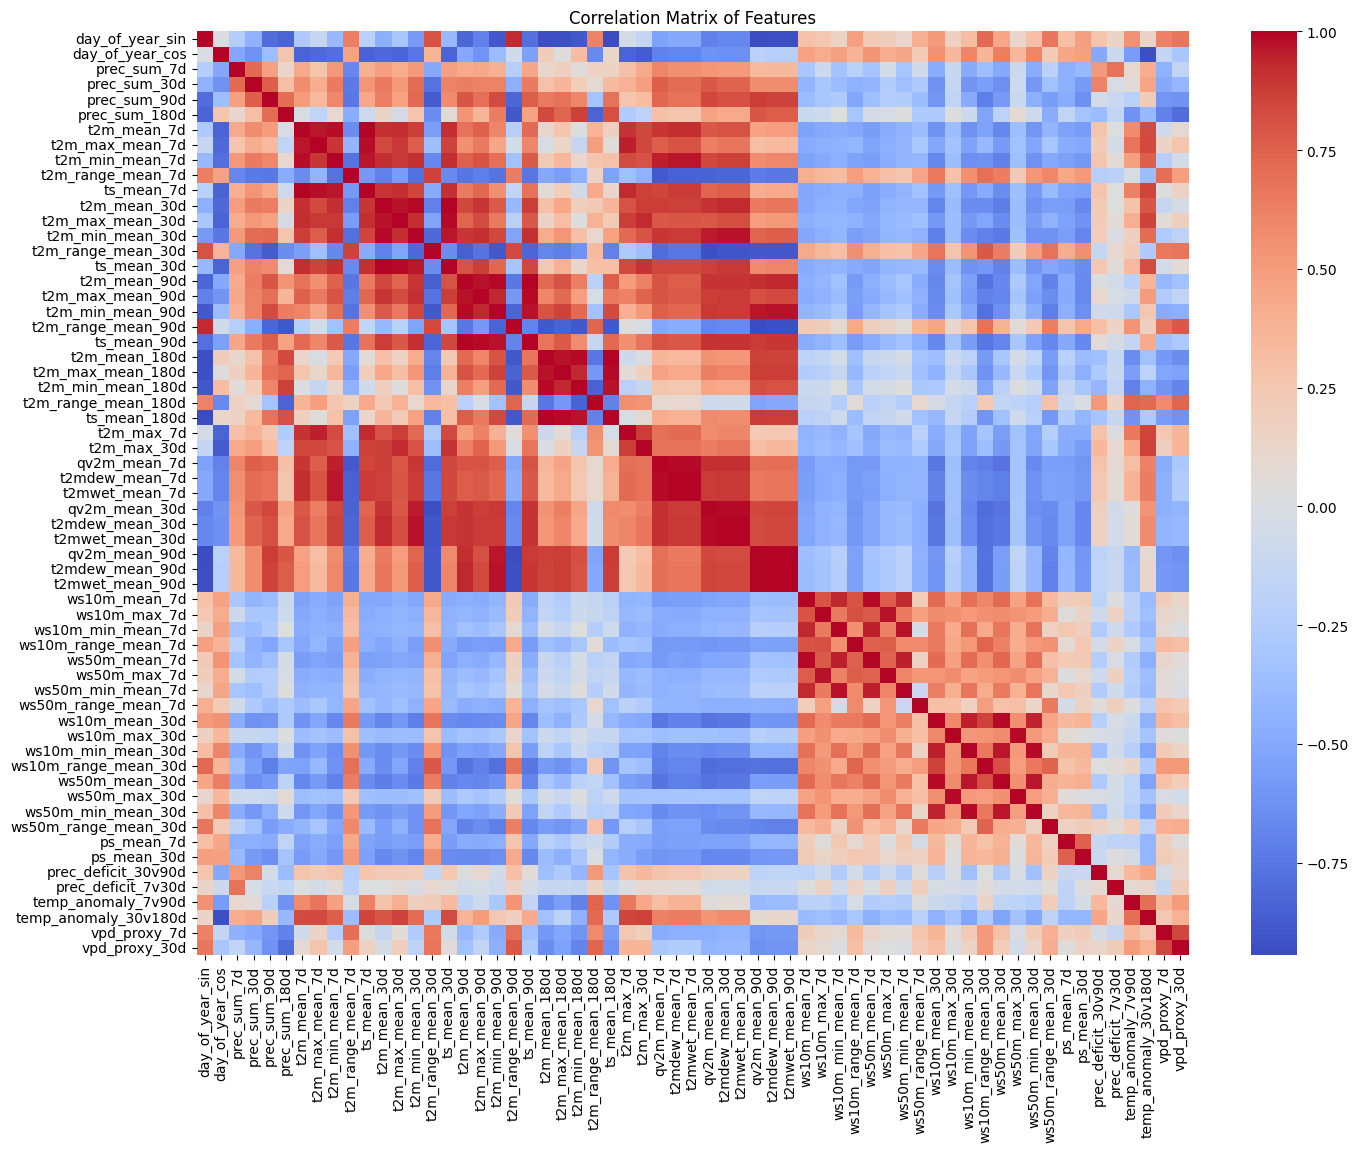

In [18]:
features_to_plot = df_train.drop(columns=['date', 'score'])
corr_matrix = features_to_plot.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [19]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
most_corr = upper_tri.stack().sort_values(ascending=False)
most_corr

t2mdew_mean_90d     t2mwet_mean_90d    1.000000
t2mdew_mean_30d     t2mwet_mean_30d    0.999999
t2mdew_mean_7d      t2mwet_mean_7d     0.999999
t2m_mean_180d       ts_mean_180d       0.996337
t2m_mean_90d        ts_mean_90d        0.996262
                                         ...   
day_of_year_sin     t2mdew_mean_90d   -0.932422
                    t2mwet_mean_90d   -0.932539
                    ts_mean_180d      -0.938321
t2m_range_mean_90d  qv2m_mean_90d     -0.938725
day_of_year_sin     qv2m_mean_90d     -0.944941
Length: 1830, dtype: float64

### Class balance
Assuming this splitting format, it is necessary to evaluate the classes balance of the target variable `score` in each dataset to ensure that the models are trained and evaluated on representative samples.

In [20]:
print("Score target on train dataset:", df_train["score"].value_counts())
print("Score target on validation dataset:", df_val["score"].value_counts())
print("Score target on test dataset:", df_test["score"].value_counts())

Score target on train dataset: score
0    563
1    124
2     74
3     74
4     52
Name: count, dtype: int64
Score target on validation dataset: score
0    61
1    17
2    16
3    10
Name: count, dtype: int64
Score target on test dataset: score
0    81
1    12
2    11
3     1
Name: count, dtype: int64


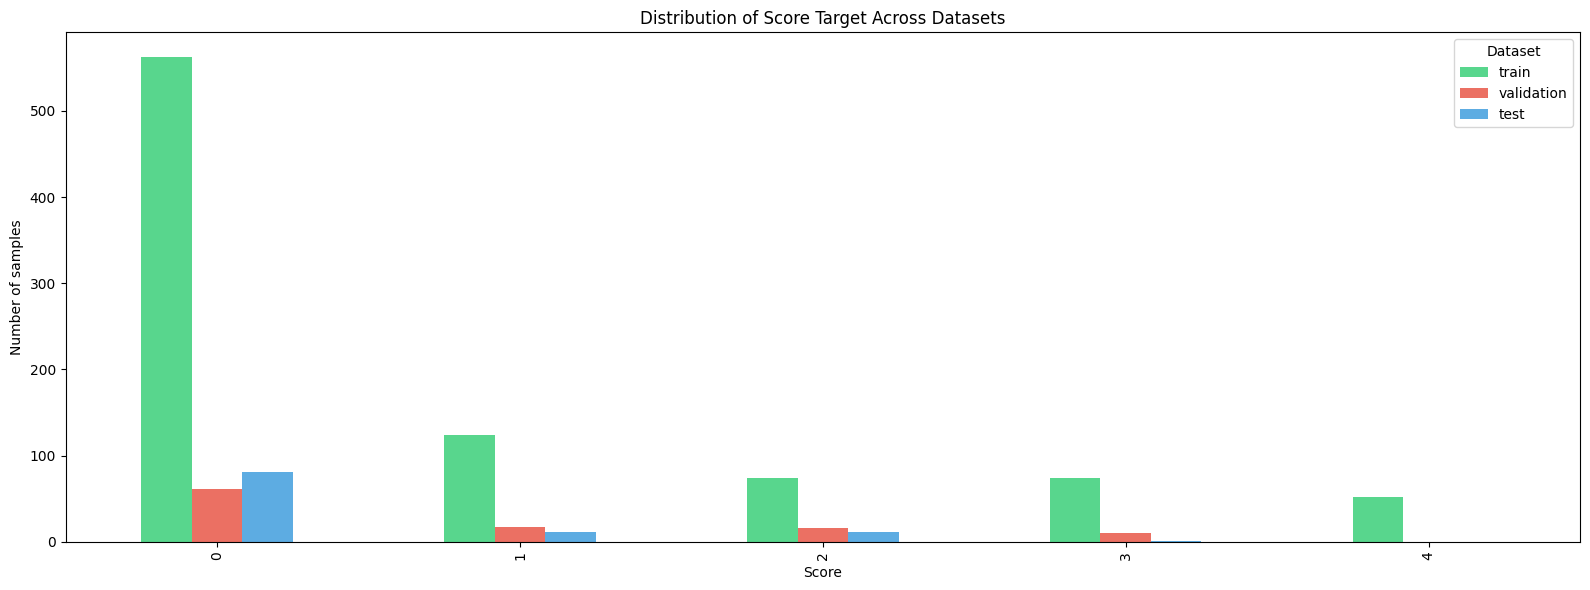

In [21]:
counts_df = pd.DataFrame({
    'train': df_train['score'].value_counts(),
    'validation': df_val['score'].value_counts(),
    'test': df_test['score'].value_counts()
}).fillna(0).sort_index()

counts_df.plot(kind='bar', figsize=(16, 6), alpha=0.8, 
               color=['#2ecc71', '#e74c3c', '#3498db'])  

plt.title("Distribution of Score Target Across Datasets")
plt.ylabel("Number of samples")
plt.xlabel("Score")
plt.xticks(rotation=90)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

## Evaluation plotocol

For the following steps, the three generated reprocessed datasets (train, validation, and test) will be used to train and evaluate different machine learning models:
- `data/generated_data/fips_6107_drought_features_train.csv`
- `data/generated_data/fips_6107_drought_features_validation.csv`
- `data/generated_data/fips_6107_drought_features_test.csv`

### Baseline Model
- **Logistic Regression** is a good baseline model because it is simple, fast to train, and easy to interpret. It provides a clear probabilistic output and helps establish a reference performance before testing more complex models. Despite its simplicity, it can capture basic relationships between meteorological variables and drought severity, making it a useful starting point for comparison.

### Two Tree-Based Models
- **Random Forest Classifier** is a strong choice for drought classification because it can model complex and nonlinear relationships between meteorological variables while remaining stable and resistant to overfitting. It works well with both continuous and categorical data and is not sensitive to feature scaling. Random Forests are also robust to noise and outliers, which are common in environmental observations. Moreover, they can handle class imbalance through class weighting and provide feature importance measures, helping to identify which variables most influence drought severity. 

- **Gradient Boosting Classifier** is well-suited for drought classification because it can capture complex nonlinear relationships between meteorological variables such as temperature, humidity, and precipitation. It handles mixed data types without requiring much preprocessing and is robust to correlated features and outliers, which are common in environmental datasets. Additionally, it allows the use of class weighting to address class imbalance (which is the case for this dataset), often present when severe drought events are less frequent. Finally, Gradient Boosting provides feature importance measures, offering interpretability and insights into which variables contribute most to drought severity, making it a strong and reliable choice.

### Data Splitting Strategy
- The data is already split into **train**, **validation**, and **test** sets.
- The **training set** will be used for model fitting.
- The **validation set** will be used for **hyperparameter tuning**.
- The **test set** will be used **only once** for final evaluation.
- This ensures **no data leakage** between splits.

### Hyperparameter Tuning Protocol
- Use **GridSearchCV** or **RandomizedSearchCV** on the **validation data**.
- The best parameters will be selected based on the validation performance.
- The model will then be retrained on the combined training and validation sets and evaluated on the **test set**.

### Evaluation Metrics
We will use the following metrics to evaluate and compare models:

1. **Accuracy** – overall correctness of predictions.
2. **F1-score** – harmonic mean of precision and recall (useful for imbalanced data).
3. **Confusion Matrix** – visual representation of class-level performance.

These metrics will be computed for both validation and test sets to assess consistency and generalization.


## Selecting Features
In order to reduce the correlation between feature, we will select some of them to feed the models, leaving other outside.

### Separating features and score

In [22]:
def split_xy(df):
    x = df.drop(columns="score")
    y = df["score"]
    return x, y

### Applying PCA

In [23]:
from sklearn.decomposition import PCA

def apply_pca(df_train, df_val, df_test, n_components=None):
    x_train, y_train = split_xy(df_train)
    x_train = x_train.drop(columns=["date"])
    x_val, y_val = split_xy(df_val)
    x_val = x_val.drop(columns=["date"])
    x_test, y_test = split_xy(df_test)
    x_test = x_test.drop(columns=["date"])

    feature_names = x_train.columns.tolist()

    pca = PCA(n_components=n_components)
    x_train_pca = pca.fit_transform(x_train)
    x_val_pca = pca.transform(x_val)
    x_test_pca = pca.transform(x_test)

    comp_names = [f"PC{i+1}" for i in range(pca.n_components_)]

    df_train_pca = pd.DataFrame(x_train_pca, columns=comp_names, index=df_train.index)
    df_val_pca   = pd.DataFrame(x_val_pca,   columns=comp_names, index=df_val.index)
    df_test_pca  = pd.DataFrame(x_test_pca,  columns=comp_names, index=df_test.index)

    # Add back target
    df_train_pca["score"] = y_train.values
    df_val_pca["score"]   = y_val.values
    df_test_pca["score"]  = y_test.values

    loadings = pd.DataFrame(pca.components_.T, columns=comp_names, index=feature_names)
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': np.sum(np.abs(pca.components_.T) * pca.explained_variance_ratio_, axis=1)
    }).sort_values('importance', ascending=False)

    return df_train_pca, df_val_pca, df_test_pca, pca, loadings

In [24]:
df_train_pca, df_val_pca, df_test_pca, pca, loadings = apply_pca(df_train, 
                                                       df_val, 
                                                       df_test, 
                                                       n_components=4
                                                       )
df_train_pca.head()

,PC1,PC2,PC3,PC4,score
0,-3.512841,-0.316183,-2.770363,-1.639996,0
1,-3.378051,-0.258972,-2.355285,-0.819919,0
2,-8.674174,-0.468237,-0.152924,0.923408,0
3,-9.782105,-0.127180,1.830519,2.288846,0
4,-9.508522,0.854007,-2.059682,0.915191,0


In [25]:
loadings

,PC1,PC2,PC3,PC4
day_of_year_sin,-0.089432,0.137866,0.003039,0.029217
day_of_year_cos,-0.082618,-0.137728,-0.053203,-0.015154
prec_sum_7d,0.096052,0.040906,0.080490,0.379321
prec_sum_30d,0.133617,0.008695,0.056150,0.272585
prec_sum_90d,0.145203,-0.107427,0.044239,0.091783
...,...,...,...,...
prec_deficit_7v30d,-0.002378,0.049366,0.056339,0.257179
temp_anomaly_7v90d,0.014150,0.252182,0.054585,-0.004345
temp_anomaly_30v180d,0.099559,0.222329,0.108115,-0.026265
vpd_proxy_7d,-0.077527,0.170288,0.046544,-0.271269


In [26]:
# Top features influencing PC
for pc in loadings.columns:
    print(f"\n{pc}:")
    print(loadings[pc].sort_values(ascending=False).head(3))


PC1:
qv2m_mean_30d      0.175100
t2mwet_mean_30d    0.174616
t2mdew_mean_30d    0.174599
Name: PC1, dtype: float64

PC2:
t2m_range_mean_180d     0.273506
temp_anomaly_7v90d      0.252182
temp_anomaly_30v180d    0.222329
Name: PC2, dtype: float64

PC3:
ws10m_mean_7d    0.290257
ws10m_max_7d     0.279964
ws50m_max_7d     0.277509
Name: PC3, dtype: float64

PC4:
prec_sum_7d            0.379321
prec_deficit_30v90d    0.305597
prec_sum_30d           0.272585
Name: PC4, dtype: float64


### Separating again features and score 

In [27]:
x_train, y_train = split_xy(df_train_pca)
x_val, y_val = split_xy(df_val_pca)
x_test, y_test = split_xy(df_test_pca)

# x_train, y_train = split_xy(df_train)
# x_train = x_train.drop(columns=["date"])
# x_val, y_val = split_xy(df_val)
# x_val = x_val.drop(columns=["date"])
# x_test, y_test = split_xy(df_test)
# x_test = x_test.drop(columns=["date"])

# Checking on train dataset
x_train.head()

,PC1,PC2,PC3,PC4
0,-3.512841,-0.316183,-2.770363,-1.639996
1,-3.378051,-0.258972,-2.355285,-0.819919
2,-8.674174,-0.468237,-0.152924,0.923408
3,-9.782105,-0.127180,1.830519,2.288846
4,-9.508522,0.854007,-2.059682,0.915191


## Evaluation Metrics

**Accuracy** Overall correctness: the proportion of all predictions that were correct, .to measure over all classes

**Precision** Correctness of positive predictions: the proportion of samples predicted as positive that were actually positive, to measure ina. specific class.

### Metrics computation

In [28]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay 

class ClassificationMetrics:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.labels = sorted(np.unique(np.concatenate([y_true, y_pred])))
        self.counts_values()

    def counts_values(self):
        support_counts = np.bincount(self.y_true)
        self.per_class_support = [
            support_counts[label] if label < len(support_counts) else 0 
            for label in self.labels
        ]
    
    def cm(self):
        return ConfusionMatrixDisplay.from_predictions(self.y_true, self.y_pred)

    # overall metrics
    def accuracy(self):
        return accuracy_score(self.y_true, self.y_pred)

    # weighted etrics
    def f1_weighted(self):
        return f1_score(self.y_true, self.y_pred, average='weighted', zero_division=0)
    
    def precision_weighted(self):
        return precision_score(self.y_true, self.y_pred, average='weighted', zero_division=0)
    
    def recall_weighted(self):
        return recall_score(self.y_true, self.y_pred, average='weighted', zero_division=0)
    
    # indivudual/per class metrics
    def class_precision(self):
        """Returns an array of precision scores for each class."""
        return precision_score(self.y_true, self.y_pred, average=None, labels=self.labels, zero_division=0)

    def class_recall(self):
        """Returns an array of recall scores for each class."""
        return recall_score(self.y_true, self.y_pred, average=None, labels=self.labels, zero_division=0)

    def class_f1(self):
        """Returns an array of F1 scores for each class."""
        return f1_score(self.y_true, self.y_pred, average=None, labels=self.labels, zero_division=0)

    # --- 4. Count of Observations ---
    def get_per_class_count(self):
        """Returns a dictionary of observation counts (support) for each class."""
        return dict(zip(self.labels, self.per_class_support))
    
    def get_total_count(self):
        """Returns the total number of observations."""
        return len(self.y_true)

    # --- 5. Full Report ---
    def print_full_report(self, decimals=3):
        print(f"Total Observations: {self.get_total_count()}")
        print(f"Overall Accuracy: {self.accuracy():.{decimals}f}")
        print(f"Weighted Precision: {self.precision_weighted():.{decimals}f}")
        print(f"Weighted Recall:    {self.recall_weighted():.{decimals}f}")
        print(f"Weighted F1-Score:  {self.f1_weighted():.{decimals}f}")

        per_precision = self.class_precision()
        per_recall = self.class_recall()
        per_f1 = self.class_f1()
        per_count = self.per_class_support

        print(f"{'Class':<10}{'Precision':>10}{'Recall':>10}{'F1-Score':>10}{'Count':>10}")
        
        for i, label in enumerate(self.labels):
            # Format the output string for each class
            print(
                f"{str(label):<10}"
                f"{per_precision[i]:>10.{decimals}f}"
                f"{per_recall[i]:>10.{decimals}f}"
                f"{per_f1[i]:>10.{decimals}f}"
                f"{per_count[i]:>10}"
            )
        self.cm()
        plt.show()

## Baseline model - Logistic Regression

### Train

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Test

In [30]:
y_pred_lr_train = lr.predict(x_train)
y_pred_lr_test = lr.predict(x_test)

accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)

print("Logistic regression - Accuracy in training:", round(accuracy_lr_train, 3))

Logistic regression - Accuracy in training: 0.663


Total Observations: 105
Overall Accuracy: 0.771
Weighted Precision: 0.711
Weighted Recall:    0.771
Weighted F1-Score:  0.719
Class      Precision    Recall  F1-Score     Count
0              0.823     0.975     0.893        81
1              0.667     0.167     0.267        12
2              0.000     0.000     0.000        11
3              0.000     0.000     0.000         1
4              0.000     0.000     0.000         0


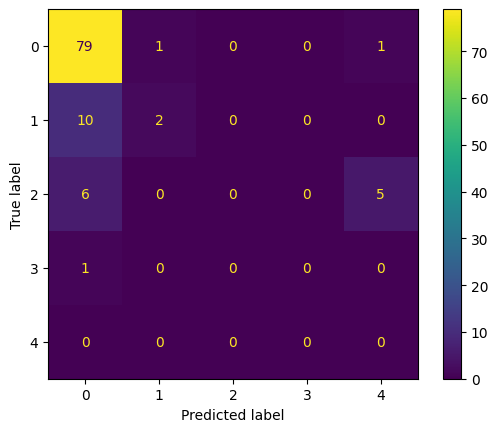

In [31]:
metrics_lr = ClassificationMetrics(y_test, y_pred_lr_test)
metrics_lr.print_full_report()

## First model - Random Forest

### Train and hyperparameter tunning

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.3, 0.5, 1, 'sqrt', 'log2', None]
}
# param_grid_rf = {
#     'n_estimators': [200, 300],
#     'max_depth': [5, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 4],
#     'max_features': [0.3, 1, 'sqrt', 'log2', None]
# }

best_score_rf = 0
best_params_rf = None

for n in param_grid_rf['n_estimators']:
    for depth in param_grid_rf['max_depth']:
        for split in param_grid_rf['min_samples_split']:
            for leaf in param_grid_rf['min_samples_leaf']:
                for features in param_grid_rf['max_features']:
                    model = RandomForestClassifier(
                        n_estimators=n,
                        max_depth=depth,
                        min_samples_split=split,
                        min_samples_leaf=leaf,
                        max_features=features,
                        class_weight='balanced',
                        bootstrap=True,
                        random_state=42
                    )
                    model.fit(x_train, y_train)
                    y_pred_rf_val = model.predict(x_val)
                    metrics_rf= ClassificationMetrics(y_val, y_pred_rf_val)
                    score = metrics_rf.precision_weighted()

                    if score > best_score_rf:
                        best_score_rf = score
                        best_params_rf = {
                            'n_estimators': n,
                            'max_depth': depth,
                            'min_samples_split': split,
                            'min_samples_leaf': leaf,
                            'max_features': features
                        }


print("Best parameters:", best_params_rf)
print("Precision weighted:", best_score_rf)

Best parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.3}
Precision weighted: 0.7113324175824176


In [33]:
rf = RandomForestClassifier(**best_params_rf, random_state=42, class_weight='balanced')
rf.fit(x_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.3
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Test

Accuracy in training: 0.703
Total Observations: 105
Overall Accuracy: 0.533
Weighted Precision: 0.699
Weighted Recall:    0.533
Weighted F1-Score:  0.604
Class      Precision    Recall  F1-Score     Count
0              0.869     0.654     0.746        81
1              0.250     0.250     0.250        12
2              0.000     0.000     0.000        11
3              0.000     0.000     0.000         1
4              0.000     0.000     0.000         0


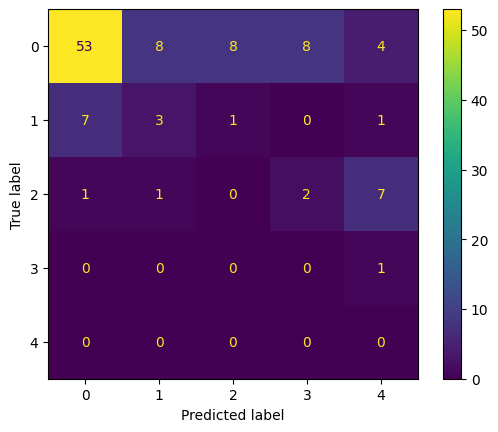

In [34]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)

print("Accuracy in training:", round(accuracy_rf_train, 3))

metrics_rf = ClassificationMetrics(y_test, y_pred_rf_test)
metrics_rf.print_full_report()

## Second model - Gradient Boosting Classifier

### Train and Hyperparameter tunning

In [35]:
# Hyperparameter grid
param_grid_gbc = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

best_score_gbc = 0
best_params_gbc = None

from sklearn.ensemble import GradientBoostingClassifier

for n in param_grid_gbc['n_estimators']:
    for rate in param_grid_gbc['learning_rate']:
        for depth in param_grid_gbc['max_depth']:
            for split in param_grid_gbc['min_samples_split']:
                for leaf in param_grid_gbc['min_samples_leaf']:
                    model = GradientBoostingClassifier(
                        n_estimators=n,
                        learning_rate=rate,
                        max_depth=depth,
                        min_samples_split=split,
                        min_samples_leaf=leaf,
                        random_state=42
                    )
                    model.fit(x_train, y_train)
                    y_pred_gbc_val = model.predict(x_val)
                    metrics_gbc= ClassificationMetrics(y_val, y_pred_gbc_val)
                    score = metrics_gbc.precision_weighted()

                    if score > best_score_gbc:
                        best_score_gbc = score
                        best_params_gbc = {
                            'n_estimators': n,
                            'learning_rate': rate,
                            'max_depth': depth,
                            'min_samples_split': split,
                            'min_samples_leaf': leaf
                        }

print("Best parameters:", best_params_gbc)
print("Precision weighted:", best_score_gbc)

Best parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 2}
Precision weighted: 0.6707417582417581


In [36]:
gbc = GradientBoostingClassifier(**best_params_gbc, random_state=42)
gbc.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


### Test

Accuracy in training: 0.885
Total Observations: 105
Overall Accuracy: 0.695
Weighted Precision: 0.640
Weighted Recall:    0.695
Weighted F1-Score:  0.663
Class      Precision    Recall  F1-Score     Count
0              0.800     0.889     0.842        81
1              0.200     0.083     0.118        12
2              0.000     0.000     0.000        11
3              0.000     0.000     0.000         1
4              0.000     0.000     0.000         0


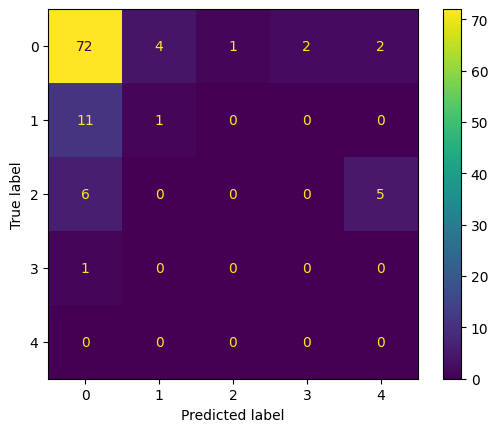

In [37]:
y_pred_gbc_train = gbc.predict(x_train)
y_pred_gbc_test = gbc.predict(x_test)

accuracy_gbc_train = accuracy_score(y_train, y_pred_gbc_train)

print("Accuracy in training:", round(accuracy_gbc_train, 3))

metrics_gbc = ClassificationMetrics(y_test, y_pred_gbc_test)
metrics_gbc.print_full_report()

## Compare the models